+
___

___
# K Means Clustering with Python


## Method Used

K Means Clustering is an unsupervised learning algorithm that tries to cluster data based on their similarity. Unsupervised learning means that there is no outcome to be predicted, and the algorithm just tries to find patterns in the data.

In k means clustering, we have the specify the number of clusters we want the data to be grouped into. The algorithm randomly assigns each observation to a cluster, and finds the centroid of each cluster. Then, the algorithm iterates through two steps:

Reassign data points to the cluster whose centroid is closest.
Calculate new centroid of each cluster.

These two steps are repeated till the within cluster variation cannot be reduced any further.
The within cluster variation is calculated as the sum of the euclidean distance between the data points and their respective cluster centroids.

## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Read Data


Dataset of delivery fleet driver data.

For each driver we have two features: mean distance driven per day and the mean percentage of time a driver was >8 km/hr over the speed limit.

In [ ]:
df = pd.read_csv('driver_data.csv')

In [ ]:
df.head()

,Distance_Feature,Speeding_Feature
0,71.24,28
1,52.53,25
2,64.54,27
3,55.69,22
4,54.58,25


### Exploratory Data Analysis and Visualization

**Explore if the dataset has any missing data points and create a statistical summary of the numerical features as shown below.**

In [ ]:
df.isna().sum()

Distance_Feature    0
Speeding_Feature    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Distance_Feature  4000 non-null   float64
 1   Speeding_Feature  4000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 62.6 KB


In [ ]:
df.describe()

,Distance_Feature,Speeding_Feature
count,4000.000000,4000.000000
mean,76.041522,10.721000
std,53.469563,13.708543
min,15.520000,0.000000
25%,45.247500,4.000000
50%,53.330000,6.000000
75%,65.632500,9.000000
max,244.790000,100.000000


****Create a boxplot for the features****

<Axes: >

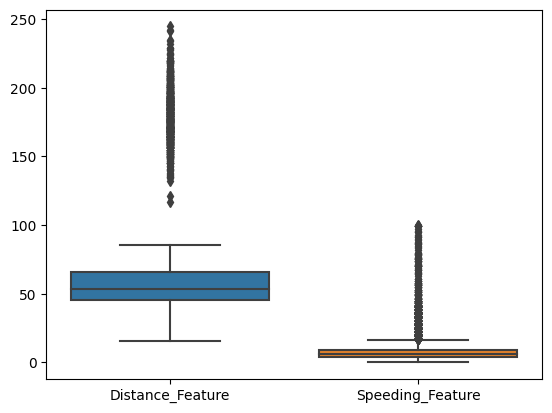

In [ ]:
sns.boxplot(df)

**Create a Scatter Plot between Speeding_Feature & Distance Feature.**

This might give us an idea on the number of clusters needed.

<Axes: xlabel='Speeding_Feature', ylabel='Distance_Feature'>

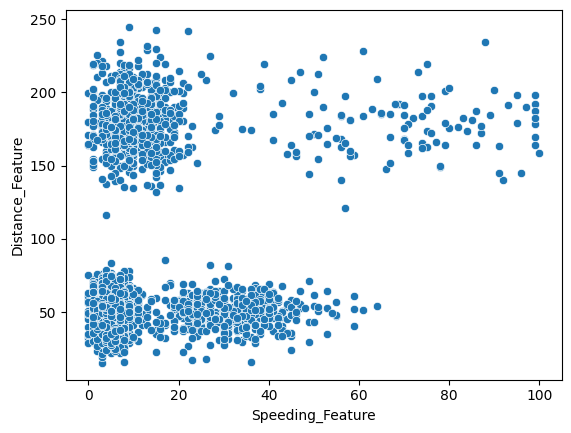

In [ ]:
sns.scatterplot(x = df['Speeding_Feature'], y = df['Distance_Feature'])

**Create a heatmap that displays the correlation between all the columns.**

<Axes: >

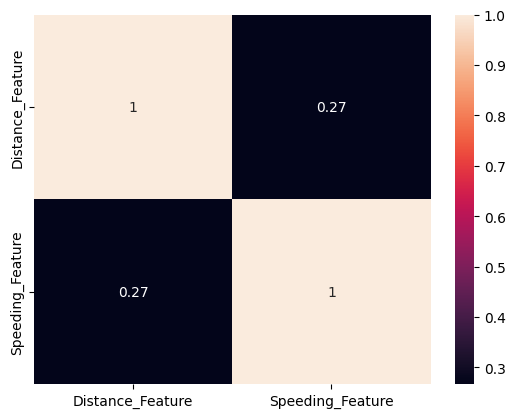

In [ ]:
sns.heatmap(df.corr(), annot = True)

## K Means Cluster Creation

Now it is time to create the Cluster labels!

**Import KMeans from SciKit Learn.**

In [ ]:
from sklearn.cluster import KMeans

**Select all features for X**

In [ ]:
df[["Speeding_Feature","Distance_Feature"]]

,Speeding_Feature,Distance_Feature
0,28,71.24
1,25,52.53
2,27,64.54
3,22,55.69
4,25,54.58
...,...,...
3995,10,160.04
3996,5,176.17
3997,12,170.91
3998,5,176.14


In [ ]:
X = df[["Speeding_Feature","Distance_Feature"]].values

## Creating the Clusters

K = 3

In [ ]:
kmeans = KMeans(n_clusters=2)

In [ ]:
kmeans.fit(X)

KMeans(n_clusters=2)

**Check selected cluster centers**

In [ ]:
kmeans.cluster_centers_

array([[  8.82875   ,  50.04763438],
       [ 18.29      , 180.017075  ]])

**Check assigned groups to data points**

In [ ]:
kmeans.labels_

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

**Check the Sum of squared distances (inertia)**

In [ ]:
kmeans.inertia_

1316420.8509477177

**Use the elbow method to find the optimal number of clusters**

In [ ]:
ssd = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(X)
    # inertia method returns wcss for that model
    ssd.append(kmeans.inertia_)

**Plot number of clusters/performence**

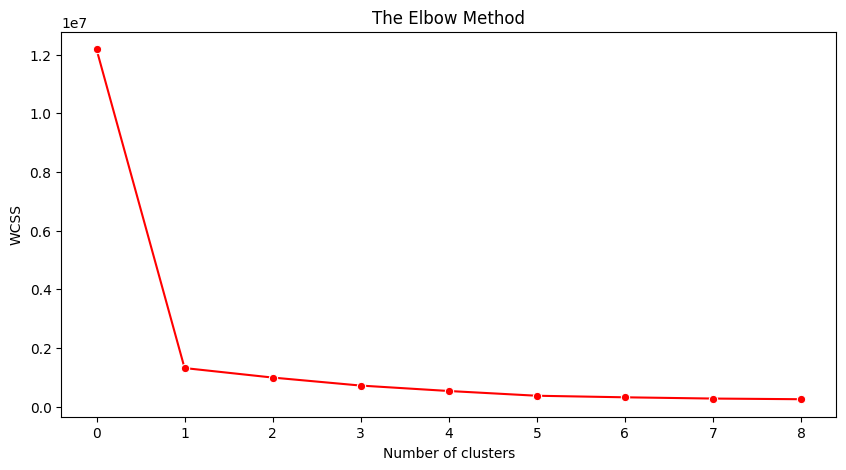

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(ssd, marker='o', color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**Train Kmeans with k=2**

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

KMeans(n_clusters=2)

**Assign labels to new "label" column**

In [ ]:
labels_sample = kmeans.labels_
df['label'] = labels_sample

**Plot data with new labels**

<Axes: xlabel='Speeding_Feature', ylabel='Distance_Feature'>

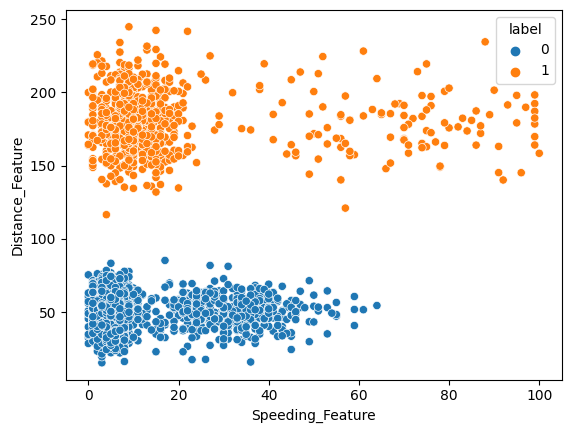

In [ ]:
sns.scatterplot(x = df["Speeding_Feature"], y = df['Distance_Feature'], hue=df['label'])

**Create a StandardScaler object and normalize the data.**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

**Assign the new scaled data to X**

In [ ]:
scaler.fit(X)

StandardScaler()

In [ ]:
X = scaler.transform(X)

**Use the elbow method to find the optimal number of clusters**

In [ ]:
ssd = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(X)
    # inertia method returns wcss for that model
    ssd.append(kmeans.inertia_)

**Plot number of clusters/performence**

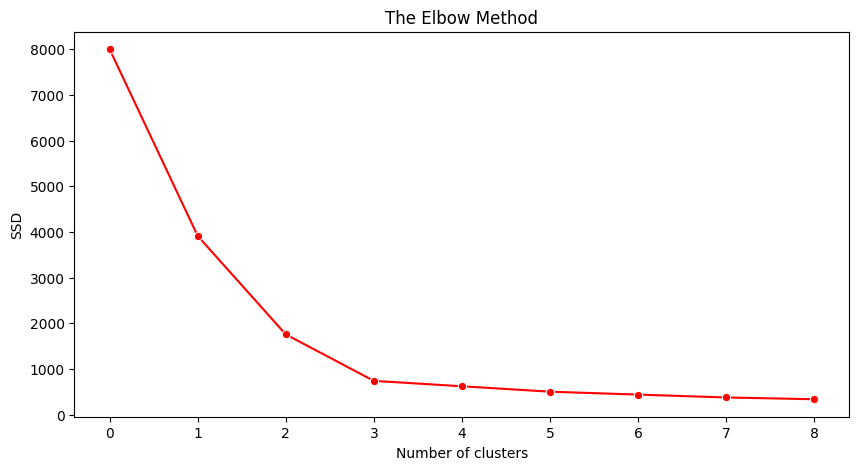

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(ssd, marker='o', color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSD')
plt.show()

**Train Kmeans with k=4**

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

KMeans(n_clusters=4)

**Assign labels to new "label" column**

PS: Make sure to transform X into a dataframe.

In [ ]:
labels_sample = kmeans.labels_
df['label'] = labels_sample

**Plot data with new labels**

<Axes: xlabel='Speeding_Feature', ylabel='Distance_Feature'>

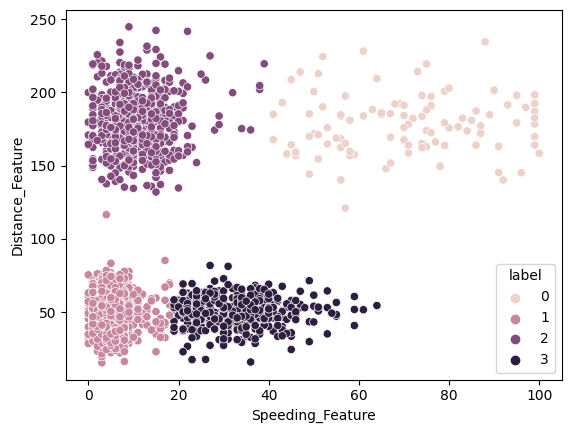

In [ ]:
sns.scatterplot(x = df["Speeding_Feature"], y = df['Distance_Feature'], hue=df['label'])

# Great Job!